In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Base Production and Cash Flow Model
time_periods = 12  # 12 months
production = np.array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320])  # Units produced
price_per_unit = 50  # Revenue per unit
variable_cost_per_unit = 30  # Variable cost per unit
fixed_costs = 1000  # Fixed costs per month

# Calculate Revenue, Costs, and Cash Flow
revenue = production * price_per_unit
variable_costs = production * variable_cost_per_unit
total_costs = variable_costs + fixed_costs
cash_flow = revenue - total_costs

# Create a DataFrame for the base model
df_base = pd.DataFrame({
    'Month': range(1, time_periods + 1),
    'Production': production,
    'Revenue': revenue,
    'Variable_Costs': variable_costs,
    'Fixed_Costs': fixed_costs,
    'Total_Costs': total_costs,
    'Cash_Flow': cash_flow
})

print("Base Model:")
print(df_base)

Base Model:
    Month  Production  Revenue  Variable_Costs  Fixed_Costs  Total_Costs  \
0       1         100     5000            3000         1000         4000   
1       2         120     6000            3600         1000         4600   
2       3         140     7000            4200         1000         5200   
3       4         160     8000            4800         1000         5800   
4       5         180     9000            5400         1000         6400   
5       6         200    10000            6000         1000         7000   
6       7         220    11000            6600         1000         7600   
7       8         240    12000            7200         1000         8200   
8       9         260    13000            7800         1000         8800   
9      10         280    14000            8400         1000         9400   
10     11         300    15000            9000         1000        10000   
11     12         320    16000            9600         1000        10600   


Base Scenario:
    Month  Production  Revenue  Variable_Costs  Fixed_Costs  Total_Costs  \
0       1         100     5000            3000         1000         4000   
1       2         120     6000            3600         1000         4600   
2       3         140     7000            4200         1000         5200   
3       4         160     8000            4800         1000         5800   
4       5         180     9000            5400         1000         6400   
5       6         200    10000            6000         1000         7000   
6       7         220    11000            6600         1000         7600   
7       8         240    12000            7200         1000         8200   
8       9         260    13000            7800         1000         8800   
9      10         280    14000            8400         1000         9400   
10     11         300    15000            9000         1000        10000   
11     12         320    16000            9600         1000        10600 

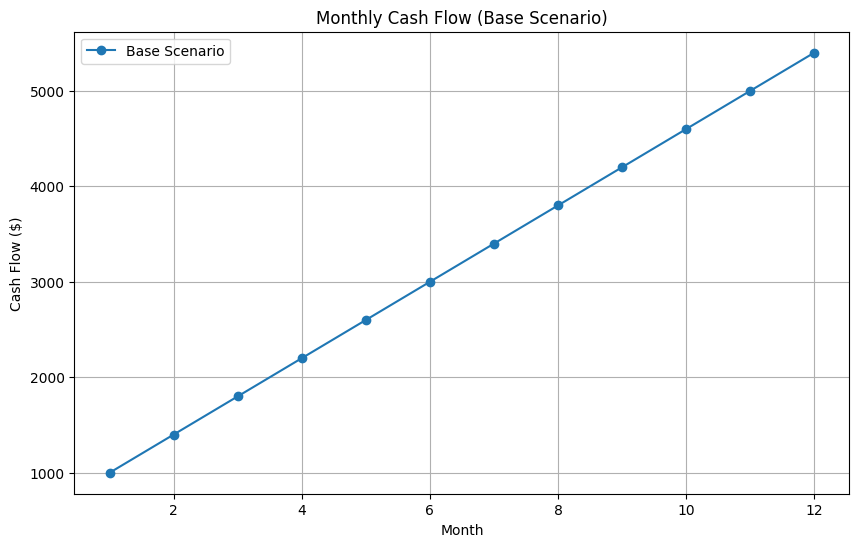

In [3]:
# Enhanced Model with Functions
def calculate_cash_flow(production, price_per_unit, variable_cost_per_unit, fixed_costs):
    revenue = production * price_per_unit
    variable_costs = production * variable_cost_per_unit
    total_costs = variable_costs + fixed_costs
    cash_flow = revenue - total_costs
    return revenue, variable_costs, total_costs, cash_flow

def create_scenario_df(production, price_per_unit, variable_cost_per_unit, fixed_costs):
    revenue, variable_costs, total_costs, cash_flow = calculate_cash_flow(production, price_per_unit, variable_cost_per_unit, fixed_costs)
    df = pd.DataFrame({
        'Month': range(1, len(production) + 1),
        'Production': production,
        'Revenue': revenue,
        'Variable_Costs': variable_costs,
        'Fixed_Costs': fixed_costs,
        'Total_Costs': total_costs,
        'Cash_Flow': cash_flow
    })
    return df

# Base Scenario
df_base = create_scenario_df(production, price_per_unit, variable_cost_per_unit, fixed_costs)
print("Base Scenario:")
print(df_base)

# Visualize Cash Flow
plt.figure(figsize=(10, 6))
plt.plot(df_base['Month'], df_base['Cash_Flow'], marker='o', label='Base Scenario')
plt.title('Monthly Cash Flow (Base Scenario)')
plt.xlabel('Month')
plt.ylabel('Cash Flow ($)')
plt.legend()
plt.grid()
plt.show()

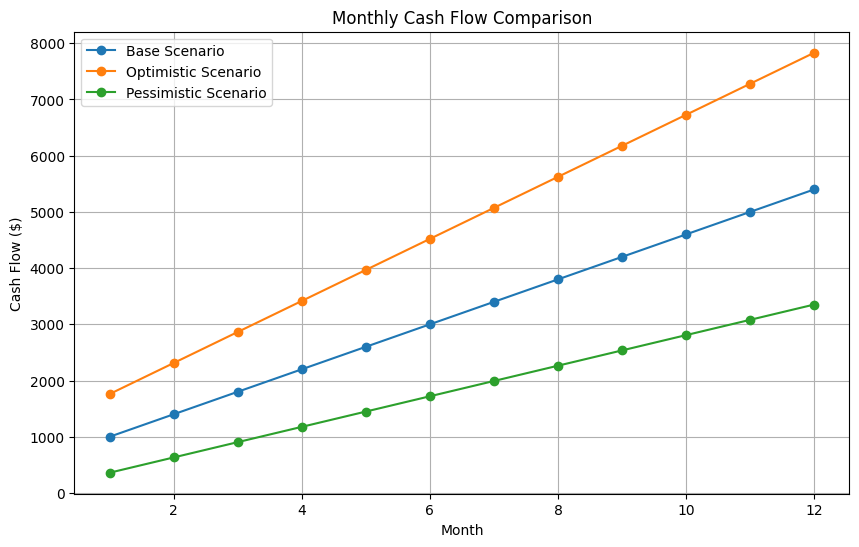

Optimistic Scenario:
    Month  Production  Revenue  Variable_Costs  Fixed_Costs  Total_Costs  \
0       1       120.0   6000.0          3240.0         1000       4240.0   
1       2       144.0   7200.0          3888.0         1000       4888.0   
2       3       168.0   8400.0          4536.0         1000       5536.0   
3       4       192.0   9600.0          5184.0         1000       6184.0   
4       5       216.0  10800.0          5832.0         1000       6832.0   
5       6       240.0  12000.0          6480.0         1000       7480.0   
6       7       264.0  13200.0          7128.0         1000       8128.0   
7       8       288.0  14400.0          7776.0         1000       8776.0   
8       9       312.0  15600.0          8424.0         1000       9424.0   
9      10       336.0  16800.0          9072.0         1000      10072.0   
10     11       360.0  18000.0          9720.0         1000      10720.0   
11     12       384.0  19200.0         10368.0         1000      11

In [4]:
# Scenario 1: Optimistic (Higher Production, Lower Costs)
production_optimistic = production * 1.2  # 20% higher production
variable_cost_per_unit_optimistic = variable_cost_per_unit * 0.9  # 10% lower variable costs
df_optimistic = create_scenario_df(production_optimistic, price_per_unit, variable_cost_per_unit_optimistic, fixed_costs)

# Scenario 2: Pessimistic (Lower Production, Higher Costs)
production_pessimistic = production * 0.8  # 20% lower production
variable_cost_per_unit_pessimistic = variable_cost_per_unit * 1.1  # 10% higher variable costs
df_pessimistic = create_scenario_df(production_pessimistic, price_per_unit, variable_cost_per_unit_pessimistic, fixed_costs)

# Compare Scenarios
plt.figure(figsize=(10, 6))
plt.plot(df_base['Month'], df_base['Cash_Flow'], marker='o', label='Base Scenario')
plt.plot(df_optimistic['Month'], df_optimistic['Cash_Flow'], marker='o', label='Optimistic Scenario')
plt.plot(df_pessimistic['Month'], df_pessimistic['Cash_Flow'], marker='o', label='Pessimistic Scenario')
plt.title('Monthly Cash Flow Comparison')
plt.xlabel('Month')
plt.ylabel('Cash Flow ($)')
plt.legend()
plt.grid()
plt.show()

# Print Scenario Summaries
print("Optimistic Scenario:")
print(df_optimistic)

print("Pessimistic Scenario:")
print(df_pessimistic)

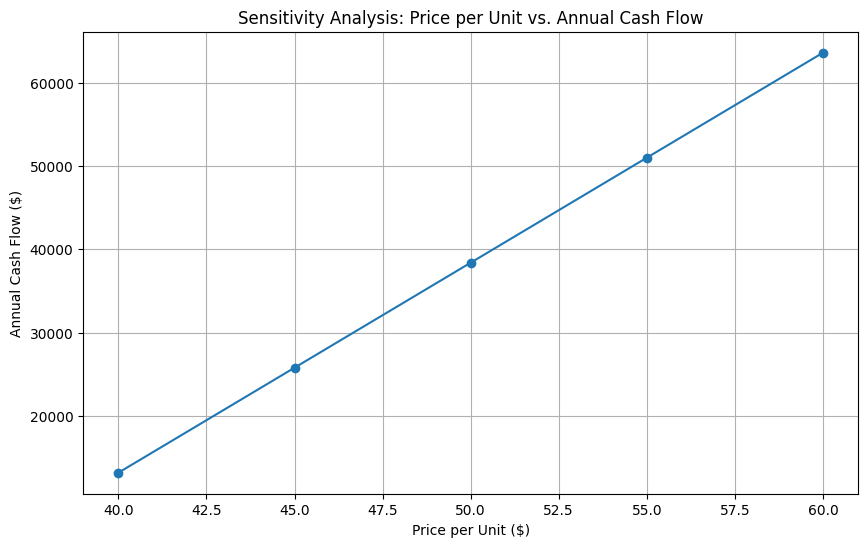

In [5]:
# Sensitivity Analysis: Price per Unit
price_range = np.linspace(40, 60, 5)  # Test prices from $40 to $60
cash_flow_sensitivity = []

for price in price_range:
    _, _, _, cash_flow = calculate_cash_flow(production, price, variable_cost_per_unit, fixed_costs)
    cash_flow_sensitivity.append(cash_flow.sum())  # Total annual cash flow

# Plot Sensitivity Analysis
plt.figure(figsize=(10, 6))
plt.plot(price_range, cash_flow_sensitivity, marker='o')
plt.title('Sensitivity Analysis: Price per Unit vs. Annual Cash Flow')
plt.xlabel('Price per Unit ($)')
plt.ylabel('Annual Cash Flow ($)')
plt.grid()
plt.show()